In [1]:
!nvidia-smi

Mon Apr  7 11:04:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   30C    P0             43W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 41.2/112.6 GB disk)


In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = 'S5VBr0SA915V05qolHVN'
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("thammasat-research-unit-in-medical-technology-innovation-and-precision-medicine")
project = workspace.project("body-fluid")
version = project.version(11)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to body-fluid-11 in yolov11:: 100%|██████████| 18815/18815 [00:02<00:00, 6849.42it/s]


In [ ]:
from google.colab import files
uploaded = files.upload()  # แล้วเลือกไฟล์ hyp.custom.yaml

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml hyp=hyp.custom.yaml epochs=20 imgsz=800 plots=True project={HOME}/drive/MyDrive/YOLOv11_runs name=exp1

/content
100% 5.35M/5.35M [00:00<00:00, 317MB/s]
New https://pypi.org/project/ultralytics/8.3.103 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/datasets/body-fluid-11/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1744024085.7fdb4cc04d88.1631.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch5420.jpg  weights
P_curve.png					    train_batch5421.jpg
PR_curve.png					    train_batch5422.jpg


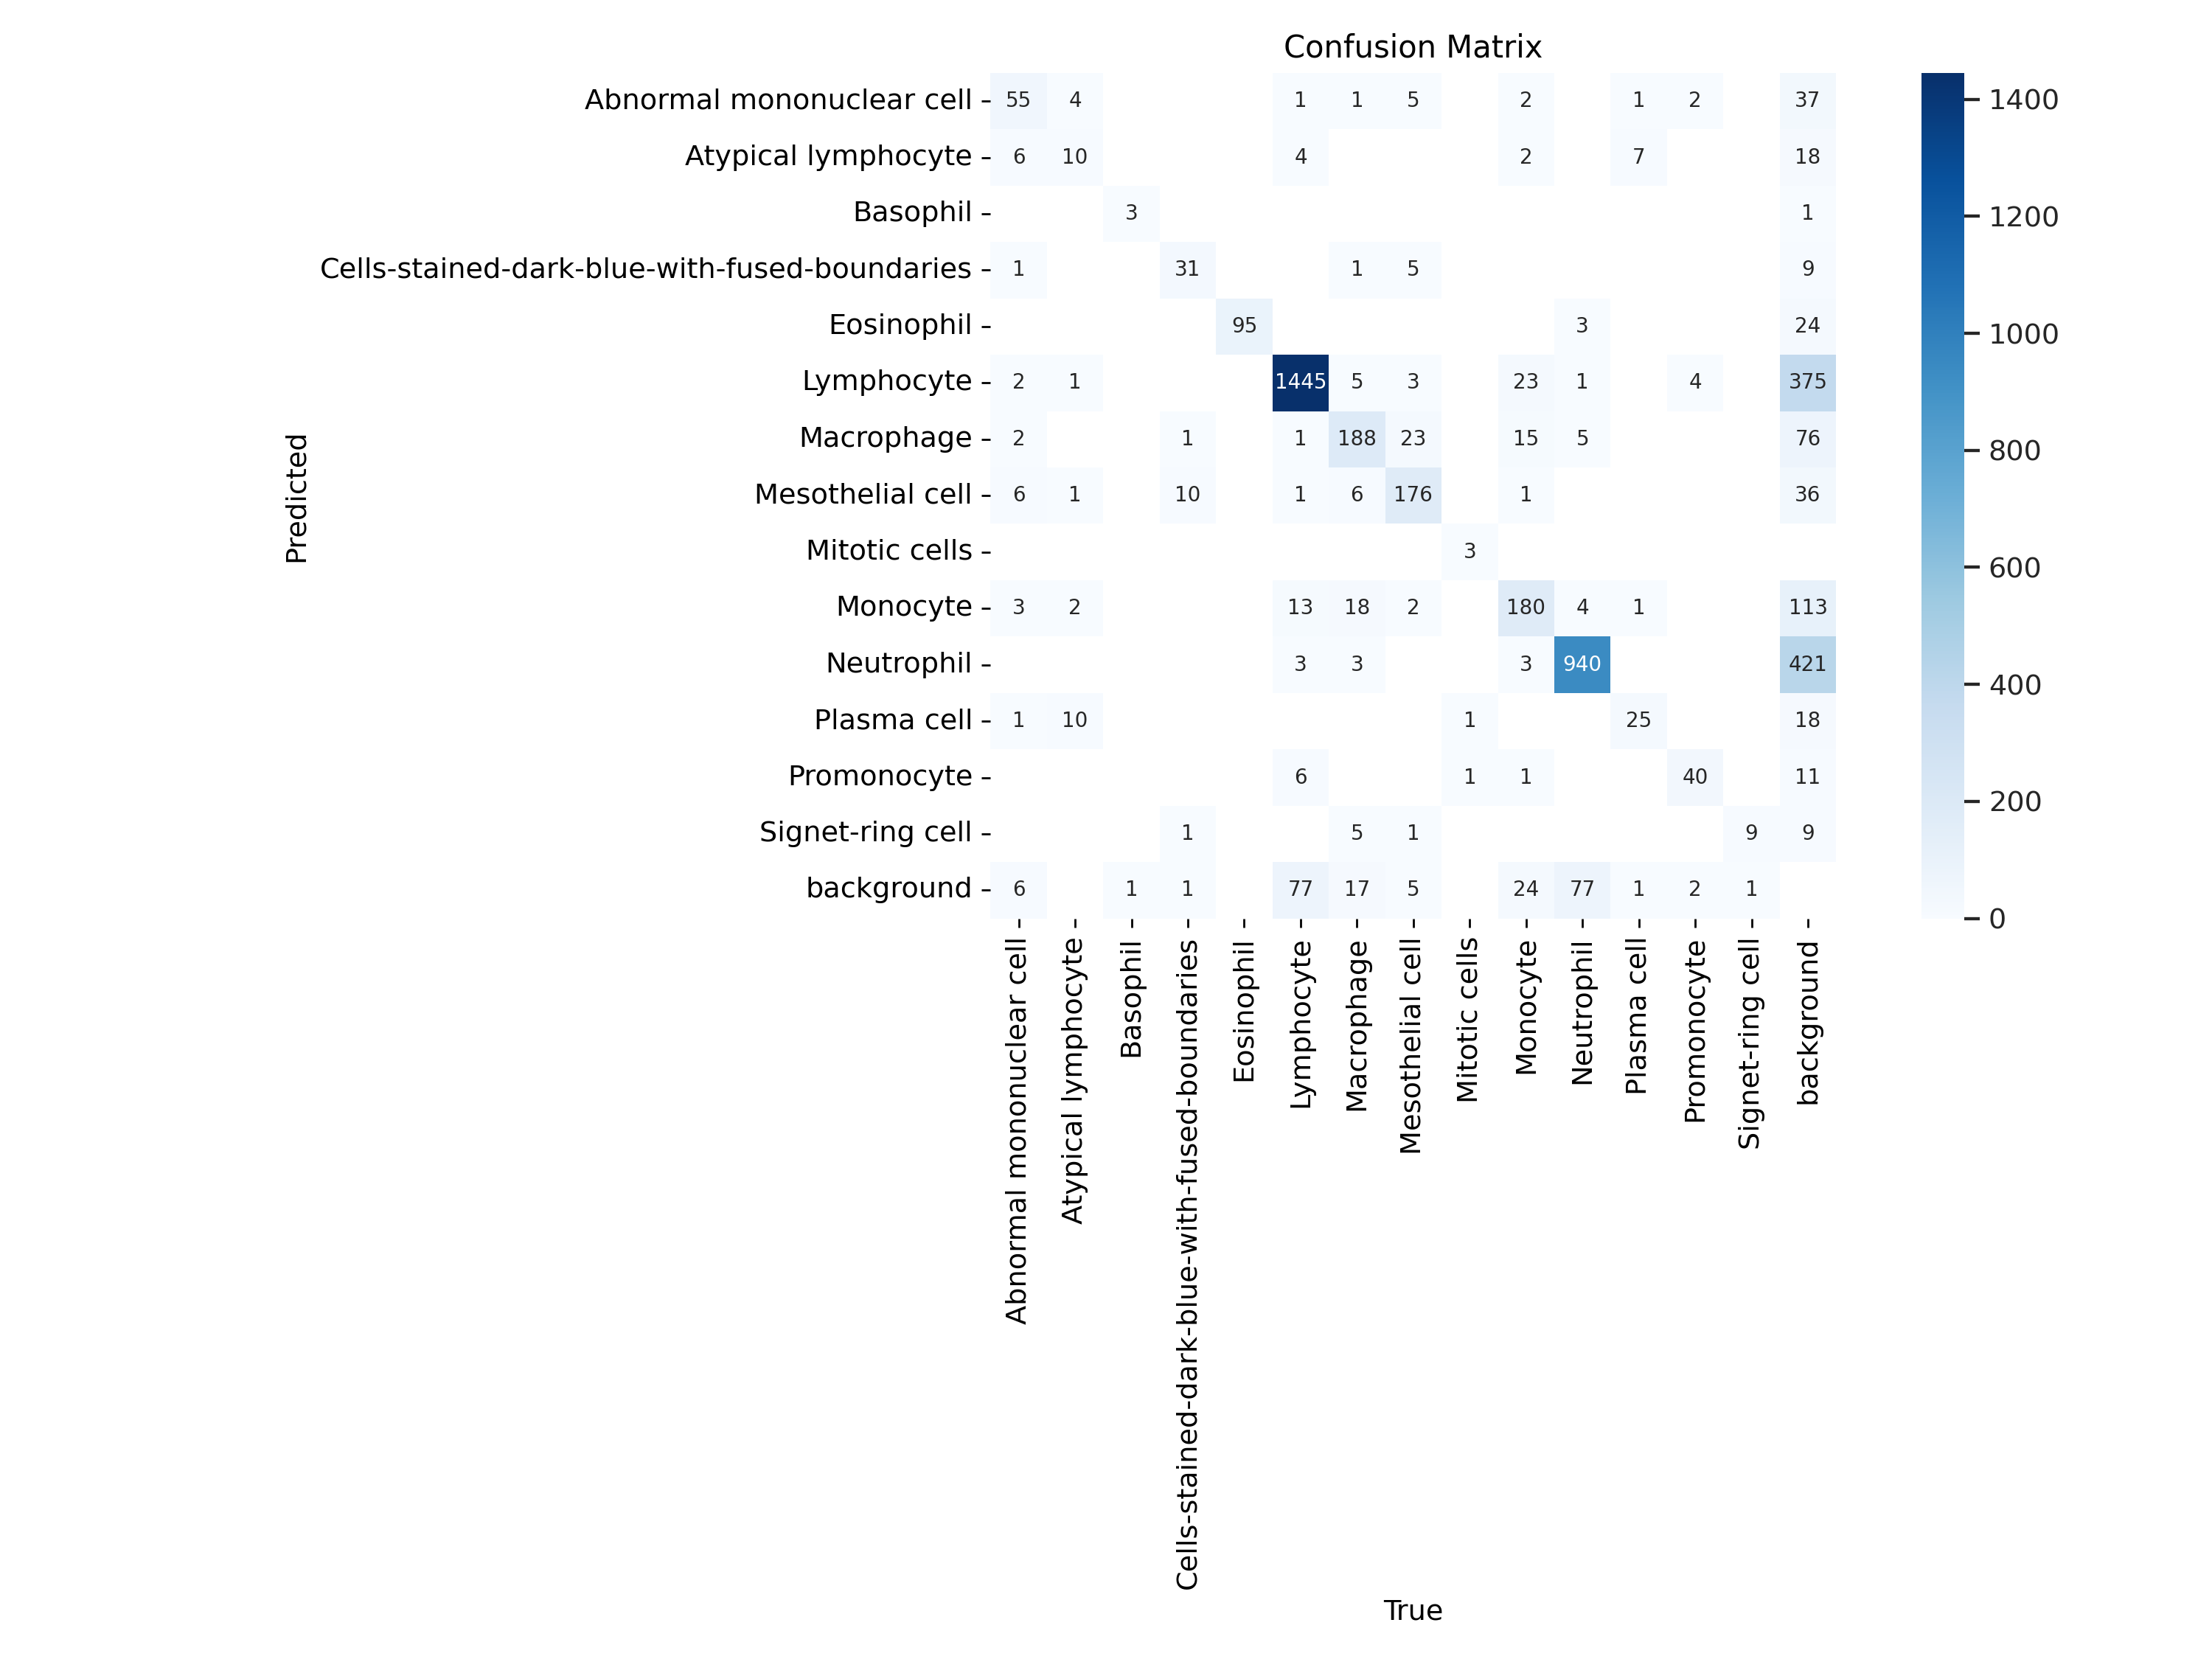

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1200)

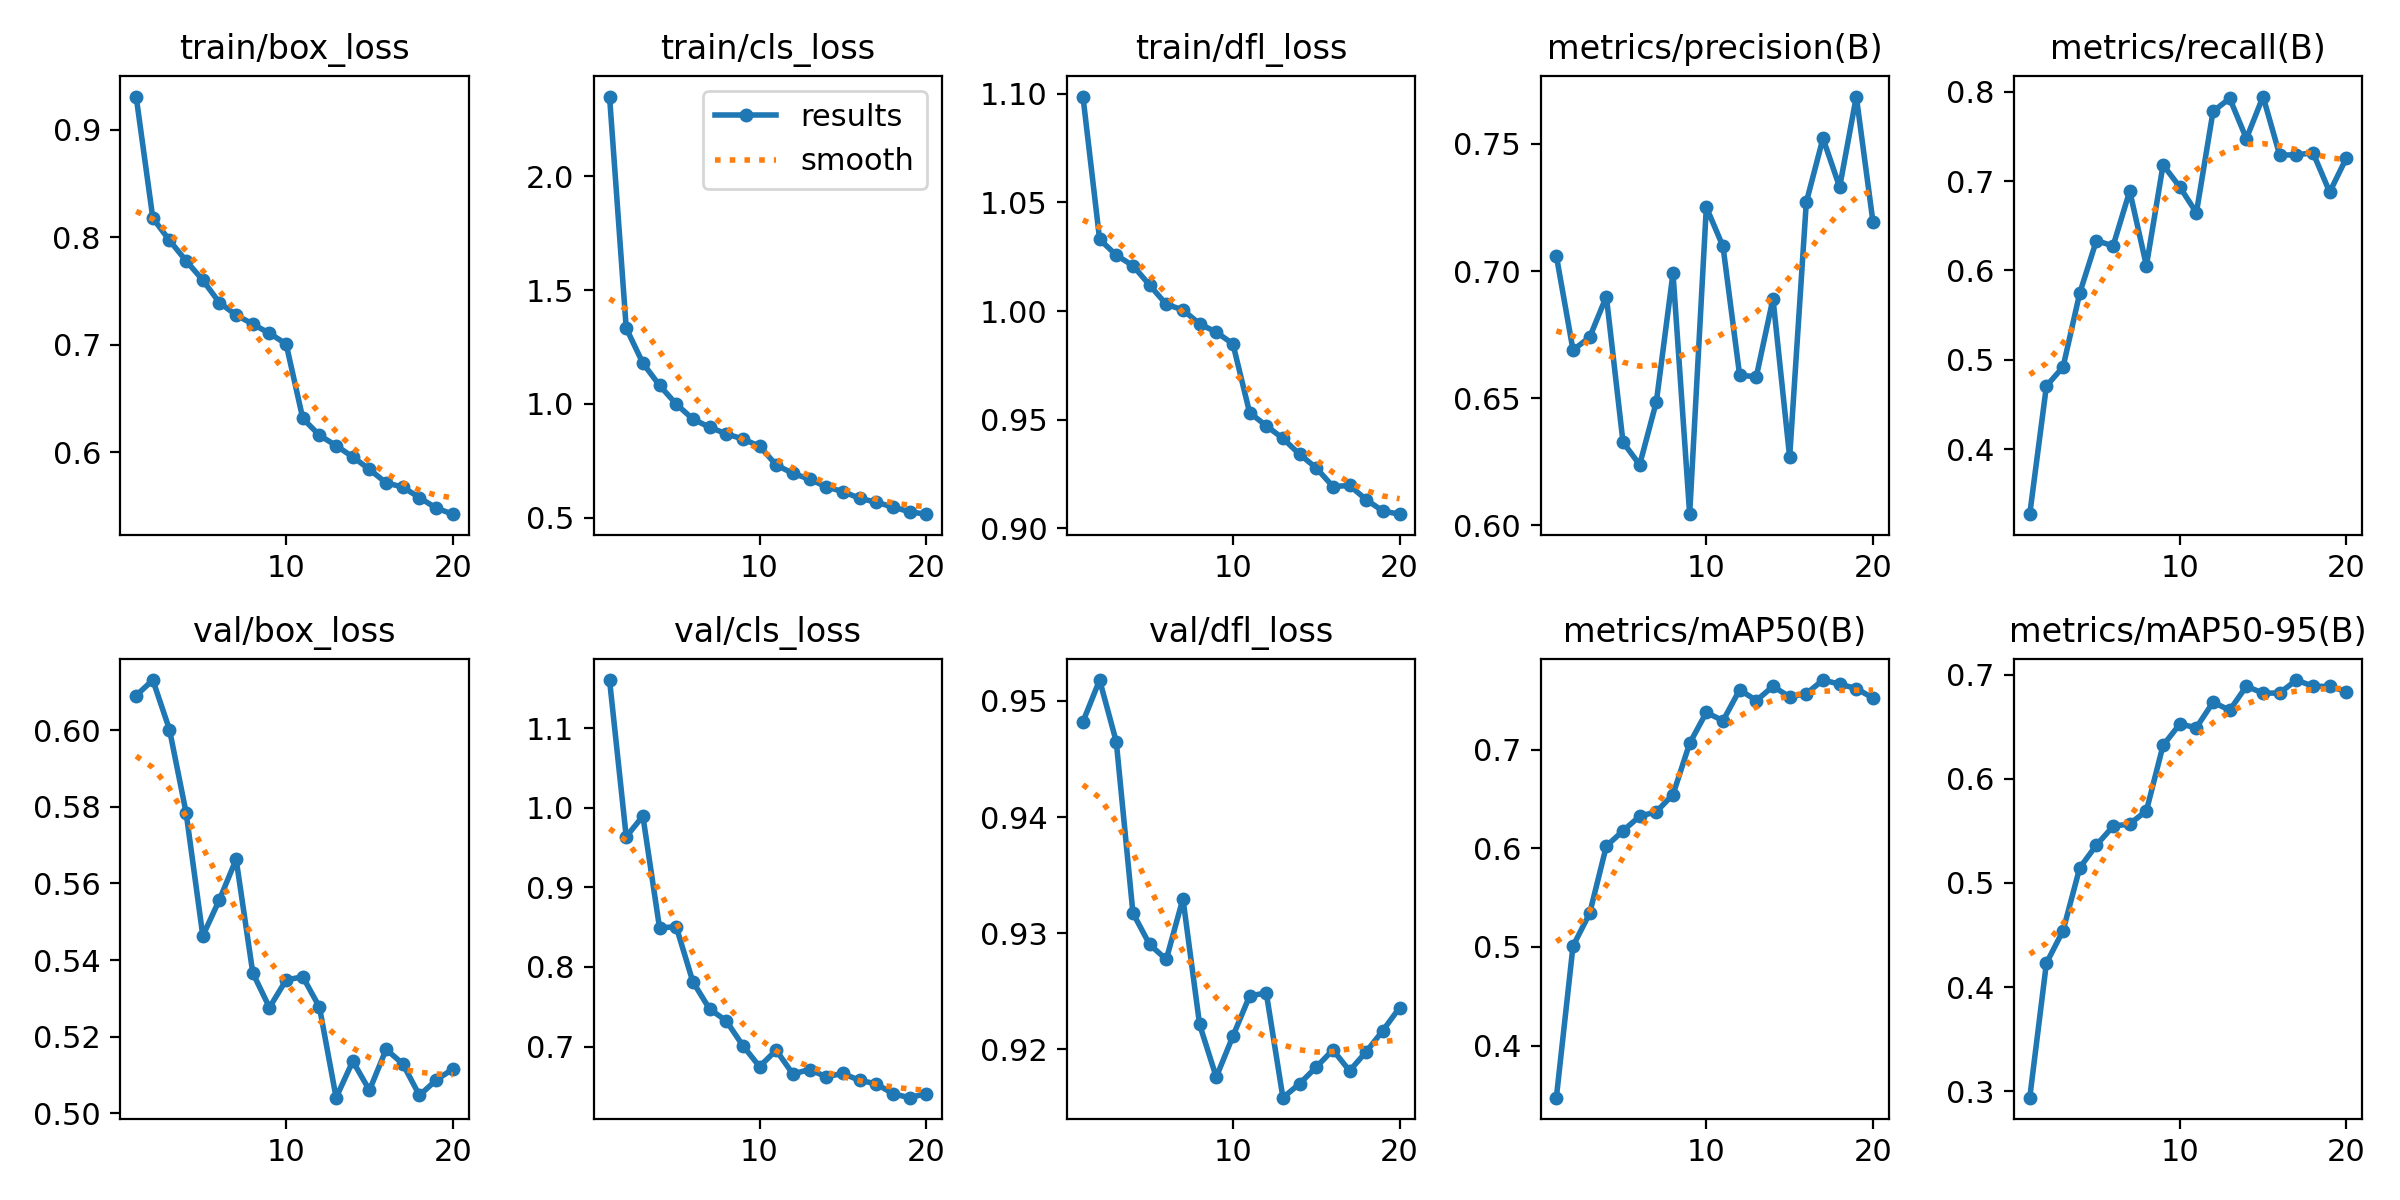

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=1200)

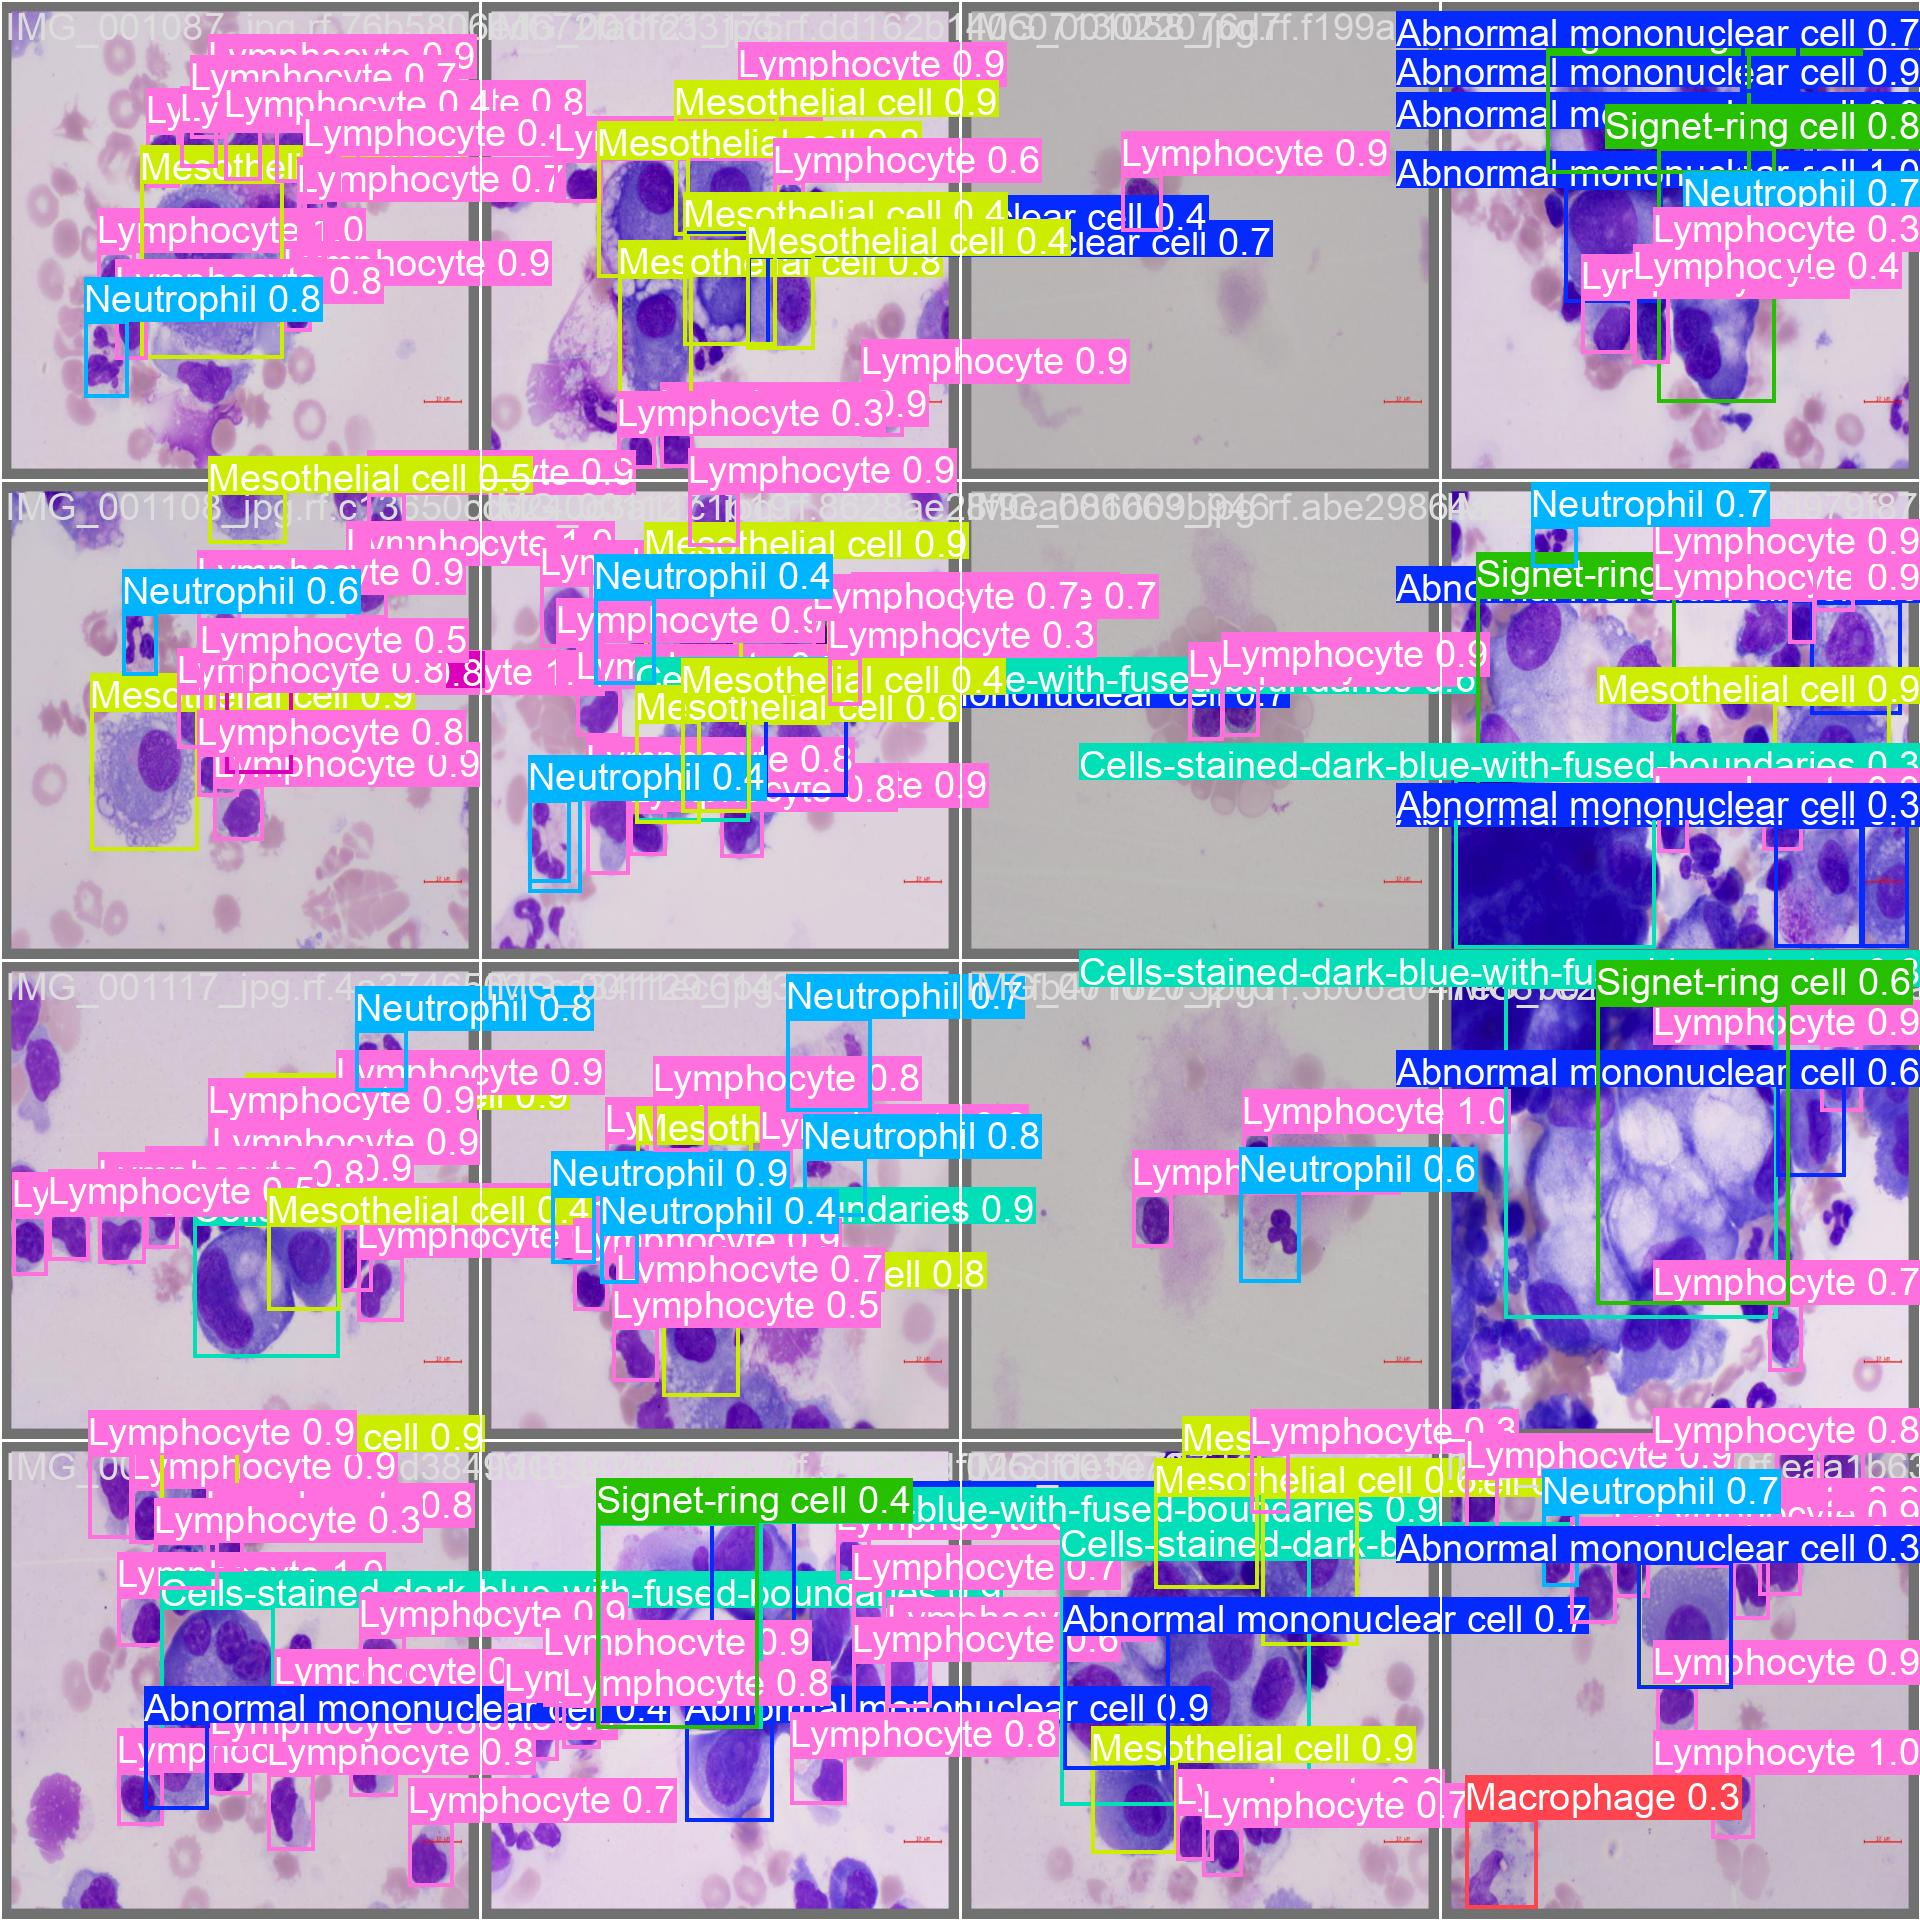

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1200)

In [10]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 238 layers, 2,584,882 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/datasets/body-fluid-11/valid/labels.cache... 495 images, 0 backgrounds, 0 corrupt: 100% 495/495 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 31/31 [00:04<00:00,  6.54it/s]
                   all        495       3647      0.752      0.729      0.771      0.696
Abnormal mononuclear cell         28         82      0.678      0.666      0.673      0.617
   Atypical lymphocyte         20         28       0.49      0.357      0.427      0.418
              Basophil          4          4      0.742      0.726      0.849      0.814
Cells-stained-dark-blue-with-fused-boundaries         36         44      0.785      0.682      0.783      0.661
            Eosinophil         37         95      0.833      0.979      0.961        0.9


In [11]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 238 layers, 2,584,882 parameters, 0 gradients, 6.3 GFLOPs

image 1/247 /content/datasets/body-fluid-11/test/images/IMG_000002_jpg.rf.09cebb2bb8100974a04c5c36096e3dee.jpg: 640x640 5 Lymphocytes, 11.2ms
image 2/247 /content/datasets/body-fluid-11/test/images/IMG_000002_jpg.rf.eb7f785581df9d8251a116a2a400f3cd.jpg: 640x640 4 Lymphocytes, 9.9ms
image 3/247 /content/datasets/body-fluid-11/test/images/IMG_000006_jpg.rf.a9ebc18ce7d49ff3da2e73fb215ae527.jpg: 640x640 2 Lymphocytes, 2 Monocytes, 9.5ms
image 4/247 /content/datasets/body-fluid-11/test/images/IMG_000007_jpg.rf.86701c4c67ed80b88393bbb1b2500644.jpg: 640x640 2 Monocytes, 4 Neutrophils, 9.3ms
image 5/247 /content/datasets/body-fluid-11/test/images/IMG_000010_jpg.rf.8074fc487a58d57f5518fb742b3e4c3d.jpg: 640x640 3 Lymphocytes, 1 Macrophage, 2 Monocytes, 2 Neutrophils, 9.3ms
image 6/247 /content/datasets/body-fluid-11/tes

In [12]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/valid/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 238 layers, 2,584,882 parameters, 0 gradients, 6.3 GFLOPs

image 1/495 /content/datasets/body-fluid-11/valid/images/IMG_000001_jpg.rf.245e9f6e5ad770325e5e0ff03e0f9ff6.jpg: 640x640 3 Lymphocytes, 1 Monocyte, 1 Neutrophil, 11.4ms
image 2/495 /content/datasets/body-fluid-11/valid/images/IMG_000002_jpg.rf.de8107e5427b50011bb8a4dddfbf1208.jpg: 640x640 1 Lymphocyte, 3 Monocytes, 5 Neutrophils, 10.0ms
image 3/495 /content/datasets/body-fluid-11/valid/images/IMG_000003_jpg.rf.46036a29805ca49af27da30bfcd301ac.jpg: 640x640 2 Lymphocytes, 2 Macrophages, 1 Mesothelial cell, 9.2ms
image 4/495 /content/datasets/body-fluid-11/valid/images/IMG_000004_jpg.rf.061d150f580399d587f0f735552ce61e.jpg: 640x640 1 Atypical lymphocyte, 4 Lymphocytes, 1 Mesothelial cell, 1 Plasma cell, 9.0ms
image 5/495 /content/datasets/body-fluid-11/valid/images/IMG_000005_jpg.rf.d95c3ad5d21d740f6e53c9d97eb824

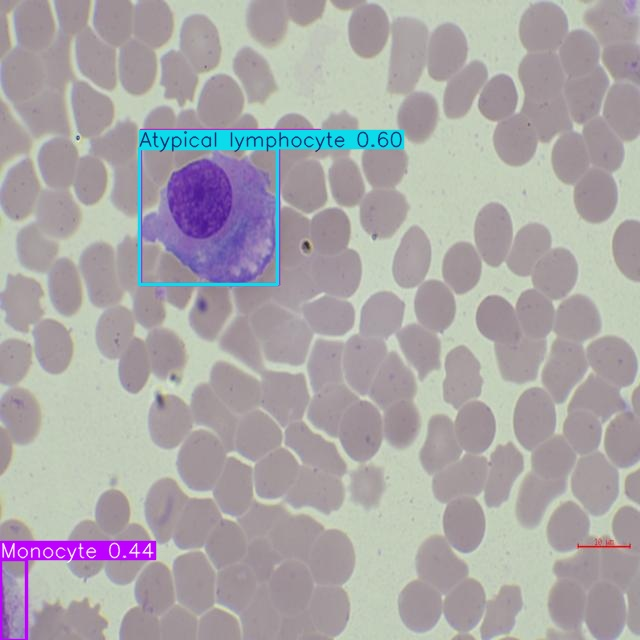

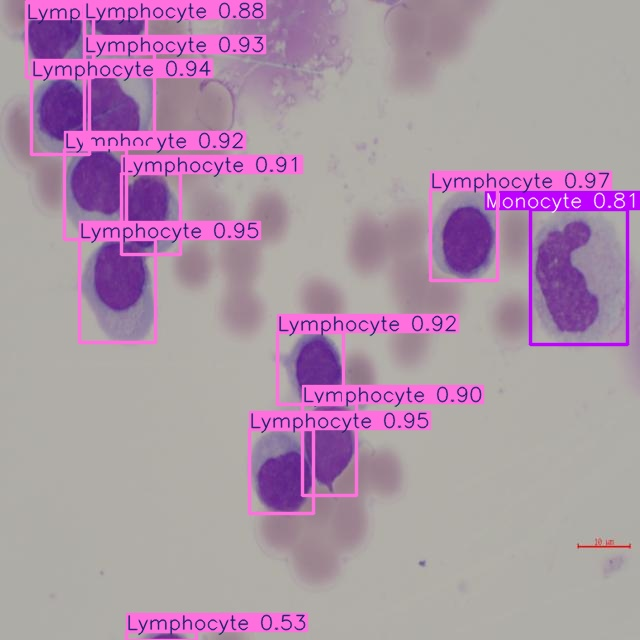

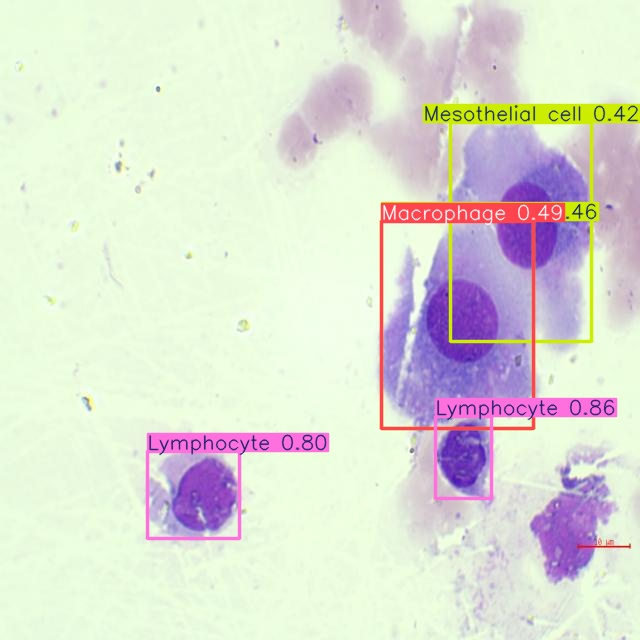

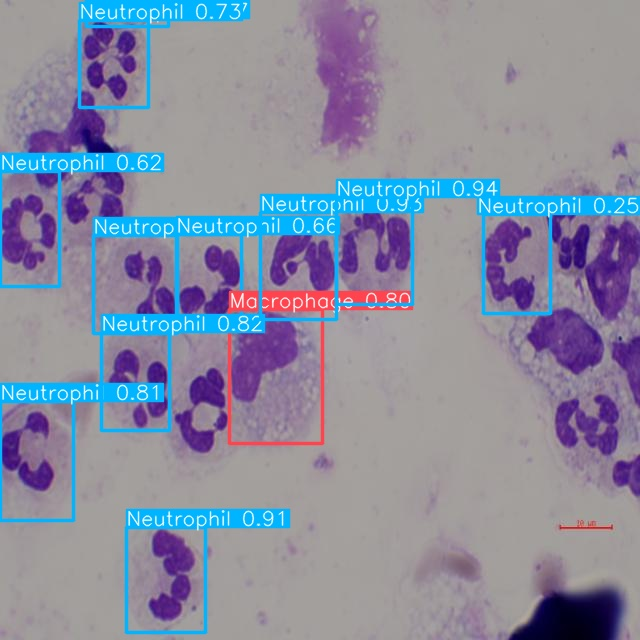

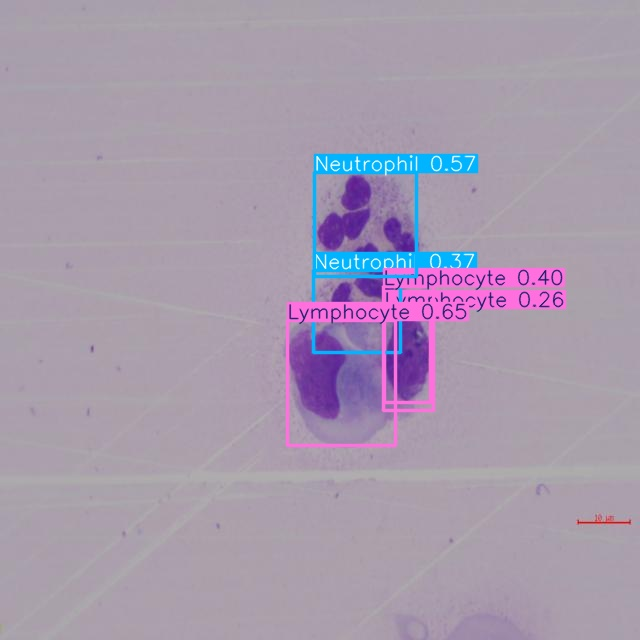

In [15]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:5]:
    display(IPyImage(filename=img, width=1000))
    print("\n")